# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 16, 2017, BEFORE the beginning of class at 6:00pm **

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    ** TEAM 8 **

    JINAL JAIN
    
    MIHIR SAWANT
    
    MANASEE GODSAY
    
    RUSHIKESH NAIDU
    
    UMESH NAIR

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Anaconda)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code (depending on your distribution, you may need to download this directly from Gitub at https://github.com/scikit-learn/scikit-learn):
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [5]:
"""Script to download the movie review dataset"""

import os
import tarfile
from contextlib import closing
try:
    from urllib import urlopen
except ImportError:
    from urllib.request import urlopen


URL = ("http://www.cs.cornell.edu/people/pabo/"
       "movie-review-data/review_polarity.tar.gz")

ARCHIVE_NAME = URL.rsplit('/', 1)[1]
DATA_FOLDER = "txt_sentoken"


if not os.path.exists(DATA_FOLDER):

    if not os.path.exists(ARCHIVE_NAME):
        print("Downloading dataset from %s (3 MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, 'wb') as archive:
            archive.write(opener.read())

    print("Decompressing %s" % ARCHIVE_NAME)
    with closing(tarfile.open(ARCHIVE_NAME, "r:gz")) as archive:
        archive.extractall(path='.')
    os.remove(ARCHIVE_NAME)

In [6]:
"""Build a sentiment analysis / polarity model
Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.
In this examples we will use a movie review dataset.
"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random


if __name__ == "__main__":
    # NOTE: we put the following in a 'if __name__ == "__main__"' protected
    # block to be able to use a multi-core grid search that also works under
    # Windows, see: http://docs.python.org/library/multiprocessing.html#windows
    # The multiprocessing module is used as the backend of joblib.Parallel
    # that is used when n_jobs != 1 in GridSearchCV

    # the training data folder must be passed as first argument
    dataset = load_files("txt_sentoken", shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    # split the dataset in training and test set:
    random.seed(1)
    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

    # TASK: Build a vectorizer / classifier pipeline that filters out tokens
    # that are too rare or too frequent
    pipeline= Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000)),
    ])

    # TASK: Build a grid search to find out whether unigrams or bigrams are
    # more useful.
    # Fit the pipeline on the training set using grid search for the parameters
    parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    # TASK: print the mean and std for each candidate along with the parameter
    # settings for all the candidates explored by grid search.
    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                 % (grid_search.cv_results_['params'][i],
                    grid_search.cv_results_['mean_test_score'][i],
                    grid_search.cv_results_['std_test_score'][i]))

    # TASK: Predict the outcome on the testing set and store it in a variable
    # named y_predicted
    y_predicted = grid_search.predict(docs_test)

    # Print the classification report
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=dataset.target_names))

    # Print and plot the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)

    

n_samples: 2000
0 params - {'vect__ngram_range': (1, 1)}; mean - 0.82; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.84; std - 0.00
             precision    recall  f1-score   support

        neg       0.87      0.86      0.87       243
        pos       0.87      0.88      0.88       257

avg / total       0.87      0.87      0.87       500

[[210  33]
 [ 31 226]]


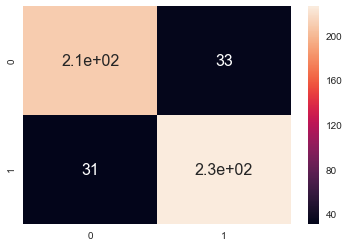

In [7]:
#plotting a heatmap for the Confusion Matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1)#for label size
ax=sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show(ax)

## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

In [8]:
#Definition of TF-IDF

#TF-IDF is the numerical statistic which determines the importance of a particular word to a document in a collection.
#The value of tf-idf increases as the frequency of the word occuring in a document increases. However td-idf is offset 
#by the frequency in the corpus which helps to adjust for the fact that some words appear more frequently than others.

#TF-IDF is the short term for term-frequency and inverse document frequency.

#Term frequency is defined as the number of times a word appears in a document. The weight of a term is hence directly proportional to the term frequency.

#Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.
#To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document.
#THis is the operational definition of Term Frequencies.

#An inverse document frequency factor in cases where certain words are more frequent than usual in a document and thus due to IDF it diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

#CountVectorizer converts a collection of text documents to a matrix of token counts.    
count_vect = CountVectorizer(encoding="utf-8",stop_words="english")
X_train_counts = count_vect.fit_transform(docs_train)
X_train_counts.shape

(1500, 34938)

In [10]:
#Since we have removed all the stop words, the get function is not able to obtain a single instance of 'is'.
count_vect.vocabulary_.get(u'is')

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer
#tdidf transformer converts the count vector to tfidfvector 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1500, 34938)

In [12]:
#The min_df is the minimum document frequency which can be allowed for a particular entity in a document. In the figure below
#the min_df has been varied from 0.02 to 0.7 with an incrememnt of 0.03 in the interval. As we can see,number of features 
#occuring in the document when min_df is 0.02 is more than 2500 and as we increased the threshold , the number of individual 
#entities decreases.

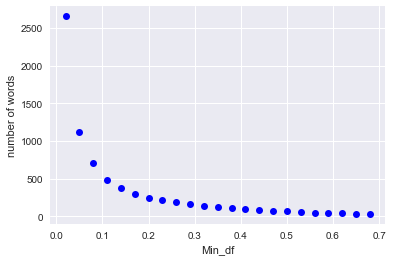

In [13]:
import numpy as np
for i in np.arange(0.02, 0.7, 0.03):
    vec = TfidfVectorizer(min_df = i, max_df = 0.9)
    tf_mat = vec.fit_transform(docs_train)
    plt.plot(i, tf_mat.shape[1], "bo")
plt.xlabel("Min_df")
plt.ylabel("number of words")
plt.show()

In [14]:
#The max_df is the maximum document frequency which can be allowed for a particular entity in a document. In the figure below
#the max_df has been varied from 0.5 to 0.99 with an incrememnt of 0.02 in the interval. As we can see,number of features 
#occuring in the document when max_df is 0.5 is more than 1040 and as we increased the threshold , the number of individual 
#entities increases.

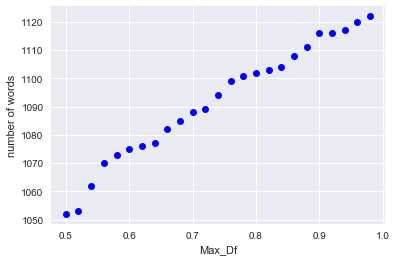

In [15]:
import numpy as np
for i in np.arange(0.5, 0.99, 0.02):
    vec = TfidfVectorizer(min_df = 0.05, max_df = i)
    tf_mat = vec.fit_transform(docs_train)
    plt.plot(i, tf_mat.shape[1], "b--o")
plt.xlabel("Max_Df")
plt.ylabel("number of words")
plt.show()

In [16]:
#N-gram
#N-gram is a given sequence of n items from a string or speech. An n-gram which distinguishes single items from a string or a 
#speech is called a unigram. Similarly bigram is an n-gram which distinguishes two items at a time.

In [17]:
#IF we have the string "Hello I am on top of the world"

#The unigram will give us the following features :
#"Hello" "I" "am" "top" "of" "the" "world"

#The bigram on the other hand would give us :

#"Hello I" "I am" "am on" "on top" "top of" "of the" "the world"

In [18]:
#TfidfVectorizer is assigning a weight to every single unigram 
vec = TfidfVectorizer(stop_words="english",ngram_range=(1,1))
abc = vec.fit_transform(docs_train)
print(vec.get_feature_names())
print(abc.toarray())

['00', '000', '0009f', '007', '00s', '03', '04', '05', '05425', '10', '100', '1000', '100m', '101', '102', '103', '105', '106', '107', '108', '10s', '10th', '11', '110', '111', '112', '113', '114', '115', '118', '11th', '12', '121', '122', '123', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '137', '138', '139', '13th', '14', '140', '1400', '143', '14th', '15', '150', '1500s', '150th', '151', '152', '1521', '153', '1554', '157', '15th', '16', '160', '1600', '161', '165', '167', '1692', '16mm', '16th', '16x9', '17', '170', '1700s', '1709', '172', '175', '1792', '1793', '1799', '17th', '18', '180', '1800', '1800s', '1812', '1830s', '1839', '1847', '1865', '1869', '1871', '1888', '1899', '18th', '19', '1900', '1900s', '1908', '1912', '1914', '1916', '1919', '1920s', '1922', '1925', '1926', '1928', '1930', '1930s', '1932', '1933', '1934', '1935', '1937', '1938', '1939', '1940', '1940s', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '

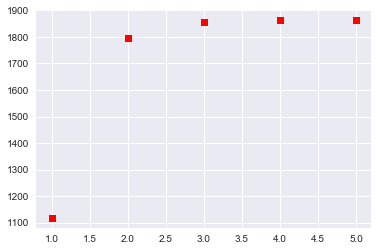

In [19]:
import numpy as np
for i in np.arange(1, 6):
    vec = TfidfVectorizer(min_df = 0.05, max_df = 0.95, ngram_range=(1,i))
    tf_mat = vec.fit_transform(docs_train)
    plt.plot(i, tf_mat.shape[1], "rs")

plt.show()

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [20]:
#Fitting docs_train using TfidfVectorizer and Computing Xtrain and Xtest
vectorizer = TfidfVectorizer(stop_words="english")
vectorizer = vectorizer.fit(docs_train)
Xtrain = vectorizer.fit_transform(docs_train)
Xtest  = vectorizer.fit_transform(docs_test)
print(Xtrain.shape)
print(Xtest.shape)


(1500, 34938)
(500, 21805)


In [21]:
#Linear SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time

#Building a pipeline for the tokens that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=6,max_df=0.7)), #how to vectorize text data
    ('clf', LinearSVC()), #what algorithm to use
])

parameters = {
    'vect__ngram_range': [(1,1), (1,2)],
}

pprint(parameters)
t0=time()
grid_search = GridSearchCV(pipeline, parameters, n_jobs=1)
grid_search.fit(docs_train,y_train)

{'vect__ngram_range': [(1, 1), (1, 2)]}


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=None, min_df=6,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
print("Cross-validated Scores:")
print(grid_search.grid_scores_ )


print("\nBest Score:")
print(grid_search.best_score_ )

#Applying prediction on test data
y_predicted=grid_search.predict(docs_test)

print("\nClassification Report:")
print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))

print("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)


Cross-validated Scores:
[mean: 0.82867, std: 0.00974, params: {'vect__ngram_range': (1, 1)}, mean: 0.84600, std: 0.01015, params: {'vect__ngram_range': (1, 2)}]

Best Score:
0.846


C:\Users\manas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)



Classification Report:
             precision    recall  f1-score   support

        neg       0.86      0.86      0.86       243
        pos       0.86      0.87      0.87       257

avg / total       0.86      0.86      0.86       500

Confusion Matrix:
[[208  35]
 [ 33 224]]


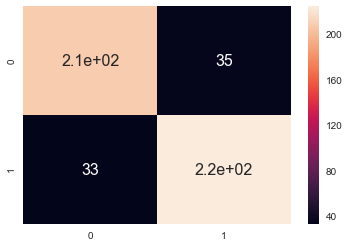

In [23]:
#Heatmap for Confusion Matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
sn.set(font_scale=1)#for label size
ax=sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show(ax)

In [26]:
#Linear SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time

#Building a pipeline for the tokens that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=6,max_df=0.5)), #how to vectorize text data
    ('clf', LinearSVC(C=0.1)), #what algorithm to use
    
])

parameters = {
    'vect__ngram_range': [(1,1), (1,2)],
}

pprint(parameters)
t0=time()
grid_search = GridSearchCV(pipeline, parameters, n_jobs=1)
grid_search.fit(docs_train,y_train)

{'vect__ngram_range': [(1, 1), (1, 2)]}


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=6,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
print("Cross-validated Scores:")
print(grid_search.grid_scores_ )


print("\nBest Score:")
print(grid_search.best_score_ )

#Applying prediction on test data
y_predicted=grid_search.predict(docs_test)

print("\nClassification Report:")
print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))

print("Confusion Matrix:")
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

Cross-validated Scores:
[mean: 0.81533, std: 0.01565, params: {'vect__ngram_range': (1, 1)}, mean: 0.82400, std: 0.02383, params: {'vect__ngram_range': (1, 2)}]

Best Score:


C:\Users\manas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


0.824

Classification Report:
             precision    recall  f1-score   support

        neg       0.84      0.82      0.83       243
        pos       0.83      0.86      0.84       257

avg / total       0.84      0.84      0.84       500

Confusion Matrix:
[[199  44]
 [ 37 220]]


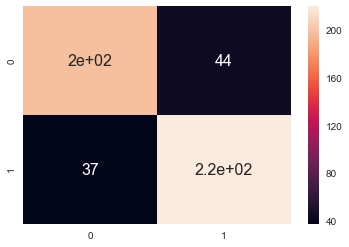

In [29]:
#Heatmap for Confusion Matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
sn.set(font_scale=1)#for label size
ax=sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show(ax)

In [30]:
#KNN with k=10
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from time import time

pipeline = Pipeline([
    ('vect', TfidfVectorizer()), #how to vectorize text data
    ('clf', KNeighborsClassifier(n_neighbors=10)), #what algorithm to use
])
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__max_df': (0.6, 0.7, 0.8),
    'vect__min_df': (5, 7, 9, 12),
}
print("Performing grid search:")
print("Parameters:")
pprint(parameters)
t0=time()

grid_search=GridSearchCV(pipeline,parameters,n_jobs=1)
grid_search.fit(docs_train,y_train)

print("\nCompleted Grid search in %0.3fs" %(time()-t0))


Performing grid search:
Parameters:
{'vect__max_df': (0.6, 0.7, 0.8),
 'vect__min_df': (5, 7, 9, 12),
 'vect__ngram_range': [(1, 1), (1, 2)]}

Completed Grid search in 185.156s


In [31]:
print("Cross-validated Scores:")
print(grid_search.grid_scores_)
print("\nBest score:")
print(grid_search.best_score_)

#Applying prediction on test data
y_predicted = grid_search.predict(docs_test)

print("\nClassification Report:")
print(metrics.classification_report(y_test,y_predicted,target_names=dataset.target_names))

print("\nConfusion Matrix:")
cm=metrics.confusion_matrix(y_test,y_predicted)
print(cm)


Cross-validated Scores:
[mean: 0.66800, std: 0.01052, params: {'vect__max_df': 0.6, 'vect__min_df': 5, 'vect__ngram_range': (1, 1)}, mean: 0.68000, std: 0.01006, params: {'vect__max_df': 0.6, 'vect__min_df': 5, 'vect__ngram_range': (1, 2)}, mean: 0.67933, std: 0.00476, params: {'vect__max_df': 0.6, 'vect__min_df': 7, 'vect__ngram_range': (1, 1)}, mean: 0.67533, std: 0.00967, params: {'vect__max_df': 0.6, 'vect__min_df': 7, 'vect__ngram_range': (1, 2)}, mean: 0.67000, std: 0.01282, params: {'vect__max_df': 0.6, 'vect__min_df': 9, 'vect__ngram_range': (1, 1)}, mean: 0.68067, std: 0.00996, params: {'vect__max_df': 0.6, 'vect__min_df': 9, 'vect__ngram_range': (1, 2)}, mean: 0.66400, std: 0.00990, params: {'vect__max_df': 0.6, 'vect__min_df': 12, 'vect__ngram_range': (1, 1)}, mean: 0.67733, std: 0.01931, params: {'vect__max_df': 0.6, 'vect__min_df': 12, 'vect__ngram_range': (1, 2)}, mean: 0.67400, std: 0.01815, params: {'vect__max_df': 0.7, 'vect__min_df': 5, 'vect__ngram_range': (1, 1)}, m

C:\Users\manas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)



Classification Report:
             precision    recall  f1-score   support

        neg       0.65      0.63      0.64       243
        pos       0.66      0.68      0.67       257

avg / total       0.66      0.66      0.66       500


Confusion Matrix:
[[152  91]
 [ 81 176]]


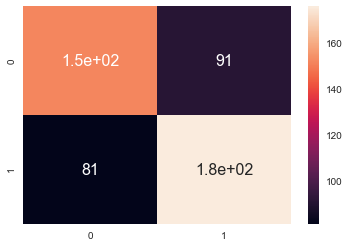

In [32]:
#Heatmap for Confusion Matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
sn.set(font_scale=1)#for label size
ax=sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show(ax)

In [33]:
#KNN with k=5
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from time import time

pipeline = Pipeline([
    ('vect', TfidfVectorizer()), #how to vectorize text data
    ('clf', KNeighborsClassifier(n_neighbors=5)), #what algorithm to use
])
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__max_df': (0.6, 0.7, 0.8),
    'vect__min_df': (5, 7, 9, 12),
    
}
print("Performing grid search:")
print("Parameters:")
pprint(parameters)
t0=time()

grid_search=GridSearchCV(pipeline,parameters,n_jobs=1)
grid_search.fit(docs_train,y_train)

print("\nCompleted Grid search in %0.3fs" %(time()-t0))

Performing grid search:
Parameters:
{'vect__max_df': (0.6, 0.7, 0.8),
 'vect__min_df': (5, 7, 9, 12),
 'vect__ngram_range': [(1, 1), (1, 2)]}

Completed Grid search in 196.038s


In [34]:
print("Cross-validated Scores:")
print(grid_search.grid_scores_)
print("\nBest score:")
print(grid_search.best_score_)

#Applying prediction on test data
y_predicted = grid_search.predict(docs_test)

print("\nClassification Report:")
print(metrics.classification_report(y_test,y_predicted,target_names=dataset.target_names))

print("\nConfusion Matrix:")
cm=metrics.confusion_matrix(y_test,y_predicted)
print(cm)

Cross-validated Scores:
[mean: 0.64333, std: 0.00798, params: {'vect__max_df': 0.6, 'vect__min_df': 5, 'vect__ngram_range': (1, 1)}, mean: 0.66000, std: 0.00990, params: {'vect__max_df': 0.6, 'vect__min_df': 5, 'vect__ngram_range': (1, 2)}, mean: 0.64400, std: 0.01095, params: {'vect__max_df': 0.6, 'vect__min_df': 7, 'vect__ngram_range': (1, 1)}, mean: 0.66600, std: 0.00720, params: {'vect__max_df': 0.6, 'vect__min_df': 7, 'vect__ngram_range': (1, 2)}, mean: 0.64867, std: 0.00729, params: {'vect__max_df': 0.6, 'vect__min_df': 9, 'vect__ngram_range': (1, 1)}, mean: 0.66200, std: 0.00791, params: {'vect__max_df': 0.6, 'vect__min_df': 9, 'vect__ngram_range': (1, 2)}, mean: 0.65067, std: 0.01179, params: {'vect__max_df': 0.6, 'vect__min_df': 12, 'vect__ngram_range': (1, 1)}, mean: 0.66067, std: 0.01365, params: {'vect__max_df': 0.6, 'vect__min_df': 12, 'vect__ngram_range': (1, 2)}, mean: 0.64667, std: 0.00948, params: {'vect__max_df': 0.7, 'vect__min_df': 5, 'vect__ngram_range': (1, 1)}, m

C:\Users\manas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)



Best score:
0.68

Classification Report:
             precision    recall  f1-score   support

        neg       0.71      0.60      0.65       243
        pos       0.67      0.77      0.72       257

avg / total       0.69      0.69      0.68       500


Confusion Matrix:
[[145  98]
 [ 59 198]]


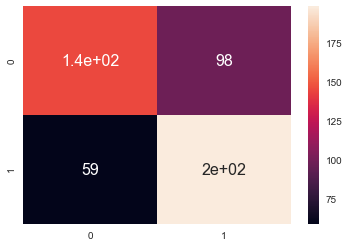

In [35]:
#Heatmap for Confusion Matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, range(2),
                  range(2))
sn.set(font_scale=1)#for label size
ax=sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.show(ax)

In [ ]:
#Looking at all the confusion matrix, we can say that the linear SVC provides a far better prediction accuracy as compared to 
#Knn with k=5 and k=10.

In [36]:
y_predicted
#Here a positive review is predicted as 1 and negative review is predicted as 0.

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1,

In [37]:
y_test
#This is our actual test set where 1 is a positive review and 0 is a negative review.

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0,

In [40]:
#false-positive
docs_test[3]

b"lengthy and lousy are two words to describe the boring drama the english patient . \ngreat acting , music and cinematography were nice , but too many dull sub-plots and characters made the film hard to follow . \nralph fiennes ( strange days , schindler's list ) gives a gripping performance as count laszlo almasy , a victim of amnesia and horrible burns after world war ii in italy . \nthe story revolves around his past , in flashback form , making it even more confusing . \nanyway , he is taken in by hana ( juliette binoche , the horseman on the roof ) , a boring war-torn nurse . \nshe was never really made into anything , until she met an indian towards the end , developing yet another sub-plot . \ncount almasy begins to remember what happened to him as it is explained by a stranger ( willem dafoe , basquiat ) . \nhis love ( kirstin scott thomas , mission impossible ) was severely injured in a plane crash , and eventually died in a cave . \nhe returned to find her dead and was heart

In [41]:
#false-negative
docs_test[11]


b'it\'s not often that i laugh so hard at a movie that my head hurts . \nbut that\'s just what happened to me at uhf , weird al yankovic\'s big screen debut . \nuhf is a television parody a la airplane , and like airplane , the movie is extraordinarily stupid . \nbut it\'s dumb in the best way a movie can be dumb : it\'s so silly and outrageous it\'s hilarious . \nthe movie stars weird al as george newman , a world class nerd with a hyperactive imagination , the type who fantasizes he\'s indiana jones and who uses hostess twinkies as hot dog buns . \ngeorge is basically a loser ; his daydreams and smart-alec attitude perpetually prevent him from holding onto a job for more than two weeks . \nbut george finally gets a chance to funnel his creativity into something productive when his uncle wins channel 62 in a poker game and makes him the general manager of the struggling uhf television station . \ngeorge revives channel 62 with innovative programming : shows like " wheel of fish " and 

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

In [42]:
#trying many different things
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA, TruncatedSVD, LatentDirichletAllocation

In [ ]:
#The approach we took was to think of the problem as an unsupervised one. 
#We wanted to cluster the positive and negative reviews based on the TF-IDF scores of every meaningful word.

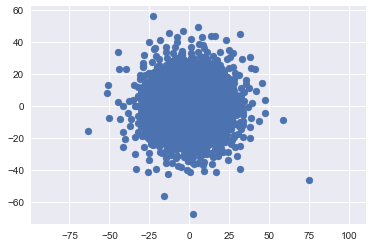

In [43]:
#Using CountVectorizer
vectorizer = CountVectorizer(stop_words = "english")
vectorizer = vectorizer.fit(docs_train)
Xtrain = vectorizer.fit_transform(docs_train)
Xtrain = Xtrain.toarray()

model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(Xtrain)
plt.scatter(out3[:, 0], out3[:, 1])
plt.axis('equal');
plt.show()

C:\Users\manas\Anaconda3\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


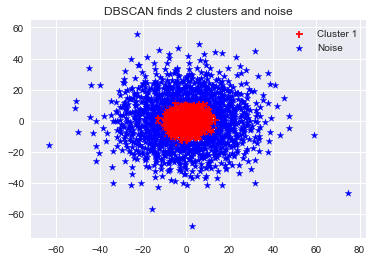

In [44]:
#Using DBSCAN
vectorizer = CountVectorizer(stop_words = "english")
vectorizer = vectorizer.fit(docs_train)
Xtrain = vectorizer.fit_transform(docs_train)
Xtrain = Xtrain.toarray()

dbscan = DBSCAN(eps = 20)
dbscan.fit(Xtrain)

model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(Xtrain)
c1,c2,c3,c4 = 0,0,0,0
for i in range(0, out3.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(out3[i,0],out3[i,1],c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(out3[i,0],out3[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(out3[i,0],out3[i,1],c='b', marker='*')
    elif dbscan.labels_[i] == 2:
        c4 = plt.scatter(out3[i,0],out3[i,1],c='black', marker=',')
plt.legend([c1, c2, c4, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

C:\Users\manas\Anaconda3\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


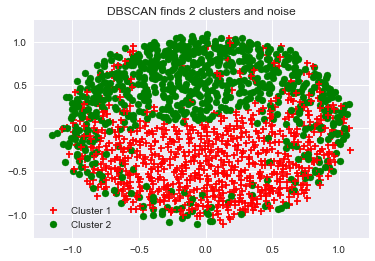

0.41933333333333334

In [45]:
#create tfidf vectors after removing the stop words and the unimportant words (by setting min_df and max_df). stripping
#accents means removing characters with those fancy signs like in French
vectorizer = TfidfVectorizer(stop_words = "english", max_df = 0.9, min_df = 0.15, strip_accents = 'ascii')
vectorizer = vectorizer.fit(docs_train)
Xtrain = vectorizer.fit_transform(docs_train)
Xtrain = Xtrain.toarray()

#Spectral Clustering
dbscan = SpectralClustering(n_clusters=2)
dbscan.fit(Xtrain)

#Multi-Dimensional Scaling
#This visualizes the whole tfidf matrix in 2 dimensions
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(Xtrain)
c1,c2,c3,c4 = 0,0,0,0
for i in range(0, out3.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(out3[i,0],out3[i,1],c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(out3[i,0],out3[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(out3[i,0],out3[i,1],c='b', marker='*')
    elif dbscan.labels_[i] == 2:
        c4 = plt.scatter(out3[i,0],out3[i,1],c='black', marker=',')
plt.legend([c1, c2, c4, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()
#confusion_matrix(y_train, dbscan.labels_)

#Measured the accuracy by comparing the clusters with y_train
#that contains the actual pos/neg categorization
accuracy_score(y_train, dbscan.labels_)

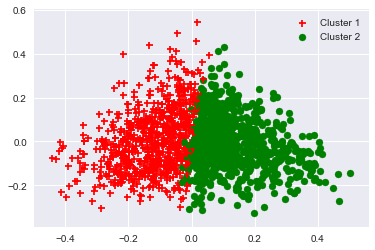

In [46]:
#KMeans to cluster
vectorizer = TfidfVectorizer(stop_words = "english", max_df = 0.9, min_df = 0.15, strip_accents = 'ascii')
vectorizer = vectorizer.fit(docs_train)
Xtrain = vectorizer.fit_transform(docs_train)
Xtrain = Xtrain.toarray()

#Initializing for K-means
dbscan = KMeans(n_clusters=2)
dbscan.fit(Xtrain)

#Using PCA to visualize
pca = PCA(n_components=2).fit(Xtrain)
pca_2d = pca.transform(Xtrain)
c1,c2,c3,c4 = 0,0,0,0
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
plt.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
plt.show()

In [47]:
#Changing parameters
vectorizer = TfidfVectorizer(stop_words = "english", max_df = 0.9, min_df = 0.15, strip_accents = 'ascii')
vectorizer = vectorizer.fit(docs_train)
Xtrain = vectorizer.fit_transform(docs_train)
Xtrain = Xtrain.toarray()

dbscan = KMeans(n_clusters=2, n_init = 30)
dbscan.fit(Xtrain)

accuracy_score(y_train, dbscan.labels_)

0.59599999999999997

In [48]:
#Singular Value Decomposition. It reduces the data to 2 dimensions before applying Spectral Clustering.
svd = TruncatedSVD(n_components = 2)
svd_2d = svd.fit_transform(Xtrain)
dbscan = SpectralClustering(n_clusters=2)
dbscan.fit(Xtrain)
accuracy_score(y_train, dbscan.labels_)

0.58066666666666666

In [ ]:
#HIERARCHIAL CLUSTERING

In [49]:
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering

ward : Time taken : 0.12s
Accuracy:  0.5955
average: euclidean : Time taken:  0.08s
Accuracy:  0.526
average: l1 : Time taken:  0.10s
Accuracy:  0.395
average: l2 : Time taken:  0.12s
Accuracy:  0.526
average: manhattan : Time taken:  0.10s
Accuracy:  0.395
average: cosine : Time taken:  0.07s
Accuracy:  0.4935
complete: euclidean : Time taken:  0.12s
Accuracy:  0.5835
complete: l1 : Time taken:  0.08s
Accuracy:  0.5545
complete: l2 : Time taken:  0.10s
Accuracy:  0.5835
complete: manhattan : Time taken:  0.08s
Accuracy:  0.5545
complete: cosine : Time taken:  0.08s
Accuracy:  0.496


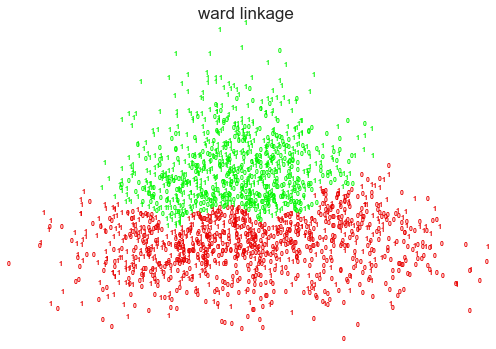

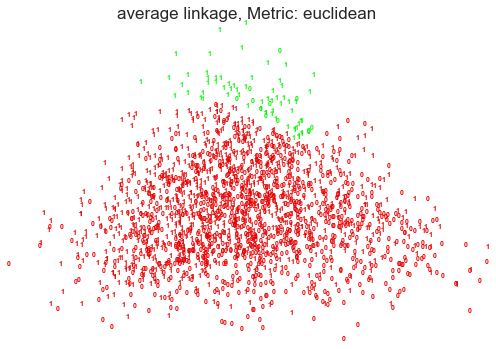

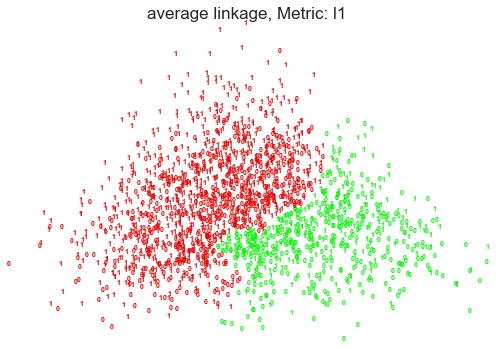

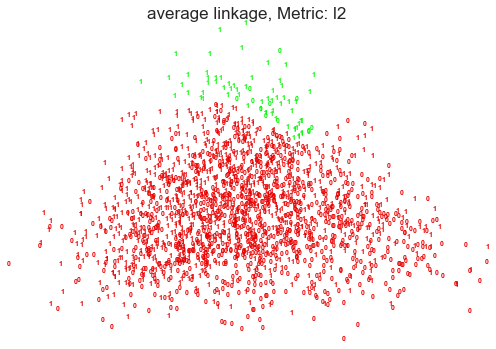

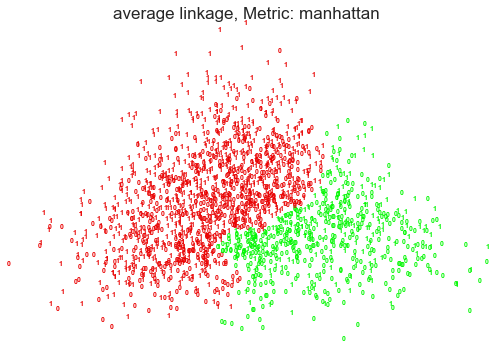

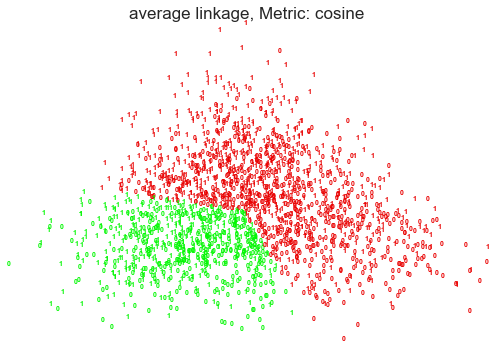

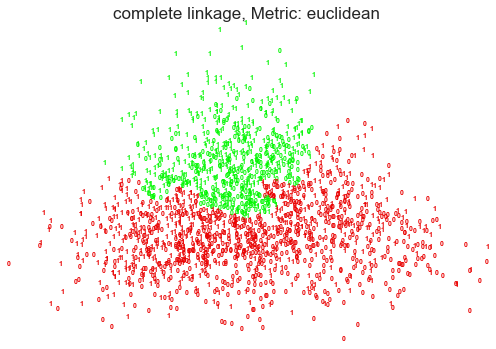

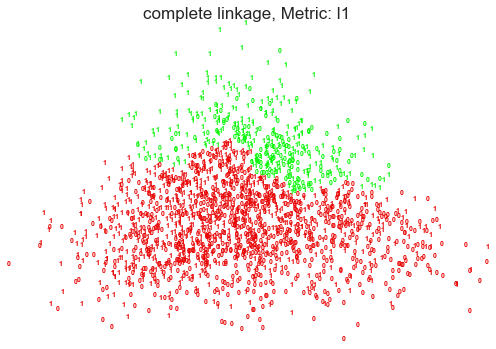

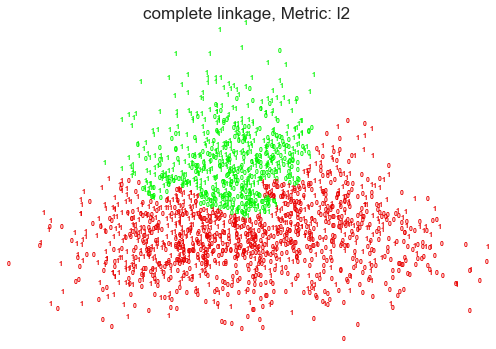

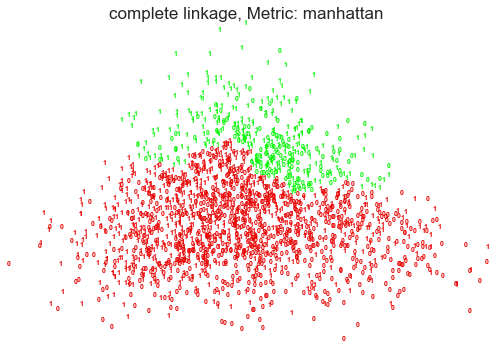

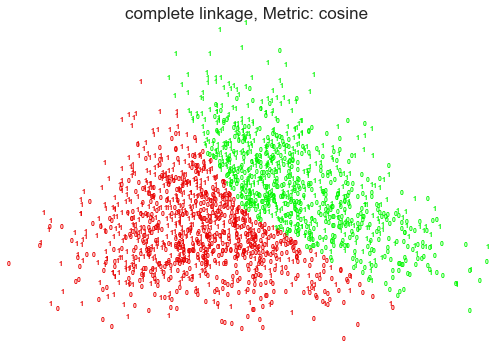

In [50]:
X = vectorizer.fit_transform(dataset.data)
X = X.toarray()

# Function to visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min) # Normalizing the data

    plt.figure(figsize=(7, 5))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(dataset.target[i]),
                 color=plt.cm.spectral(225) if labels[i]==0 else plt.cm.spectral(150),
                 fontdict={'weight': 'bold', 'size': 7})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

# Spectral Embedding for Dimensionality reduction
X_red = manifold.SpectralEmbedding(n_components=2, affinity='rbf').fit_transform(X)

# Performing hierarchical clustering with different parameter values for linkage and affinity to check for best results
for linkage in ('ward', 'average', 'complete'):
    # Ward supports only Euclidean distance
    if linkage == 'ward':
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2)
        t0 = time()
        clustering.fit(X_red)
        print("%s : Time taken : %.2fs" % (linkage, time() - t0))
        print("Accuracy: ", accuracy_score(dataset.target, clustering.labels_))  # Printing accuracy scores after comparing with labels from dataset

        plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage) # Visualizing the clusters
    else:
        # For all other linkage methods, trying different affinity calculation methods
        for affinity in ('euclidean', 'l1', 'l2', 'manhattan', 'cosine'):
            clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2, affinity=affinity)
            t0 = time()
            clustering.fit(X_red)
            print("%s: %s : Time taken:  %.2fs" % (linkage, affinity, time() - t0))
            print("Accuracy: ", accuracy_score(dataset.target, clustering.labels_))

            plot_clustering(X_red, X, clustering.labels_, "%s linkage, Metric: %s" %(linkage, affinity))
plt.show()

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 3 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **